# Lecture3 Loss Functions and Optimization

https://cs231n.github.io/linear-classify/

## Contents of Table

- ## To Do
    - **Loss Function**
        - Def 
        - Usage
        - 
    - **Optimization**
        - Def 
            - find the parameters that minimize the loss function

            - point of machine learning is not lies in fitting train data, but test data
            - we usally solve this problem(overfit) by using regularization
                -  add additional terms of loss function 
                    - Occam's Razor

## Loss Function

- ### Def
    - Measures that quantifies unhappinesss of the model's result compare with the optimal choice
        - how to quantify how bad are diffenrent mistake
        - how to weight off the different trade-offs between different types of mistake the classifier might make
- ### Usage
    - Tell how good our current classifier is, given a dataset 
    - Use as objective function for optimization
        - Associated with Econ's Utility function(negative)
- ### Type
    - #### Hinge Loss
        - maximum-margin classification
        - Max form function
        - Care only whether the score of ture class is **much** higher **than** the score of other classes, not the score **itself**
            - **much**
                - more than the given margin
            - **than**
                - relatively higher
                    - Difference between Softmax
            - **itself**
                - Cares absolute score
                    - Softmax
         - If score of true category is larger than the scroe of False catefories, than Loss is zero
         - If the true class's score is less than the other score, than we get some loss
        - #### Diff with Squared Hinge Loss
            - if we use hinge loss
                - we don't actually care between being a little bit wrong and being a lot wrong 
            - if we use squred hinge loss
                - very bad things can be interpreted as squred very bad things 


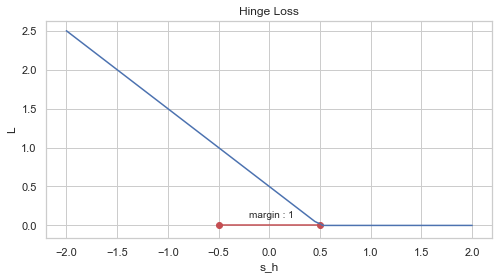

In [5]:
%matplotlib inline
## params
s_j = -0.5
fixed_margin = 1

s_y = np.linspace(-2, 2)
L = [np.max([x, 0]) for x in (s_j - s_y + fixed_margin)]
fig = plt.figure(figsize = (8, 4))
plt.plot(s_y, L)
plt.scatter(s_j, 0, c = "r")
plt.plot([s_j, s_j + fixed_margin ], [0,0], c = "r")
plt.scatter(s_j + 1, 0, c = "r")
plt.text(s_j + 0.3, .1, f"margin : {fixed_margin }" )
plt.title("Hinge Loss")
plt.xlabel("s_h")
plt.ylabel("L")
plt.show()

- ### Regularization
    - **Def**
        - Anything that penalizes the complexity of the model
            - rather than explicitly trying to fit the training data
    - **Usage**
        - usually we use L2 regulizer(weight decay)
            - But choosing regulizer depends on how do you think that the complexity should be measured
        - $\lambda R(W)$terms help model to prefer regression model to be lower degree rather than higher degree
     
    - **Examples**
        - **L2 regularizaiton **
            - **Def** 
                - penalizing the euclidian norm of W
                - weight decay
                - measure the complexity of classifier
            - **Equation**
                - $R(W) \sum\sum W^2$
            - **Mechanism**
                - Deals with second momentum
                    - Linear classification useally done with dot product.
                    - However, L2 regularization deals with second momentum
                        - which dot product does not measure
                        - L2 norm can capture some situation that dot product omits
                            - especially situation that [0.25, 0.25, 0.25, 0.25] and [0, 0, 0, 1]
            - **See also**
                - MAP inference using a Gaussian prior on W
        - **L1 regularization**
            - **Def**
                - penalizing L1 norm of W
                - Encourage sparse solutions
                    - derives all your entries of W to zero
                    - number of non-zero entries
            - **Equation**
                - $R(W) \sum\sum |W|$                  
        - **Elastic net(L1 + L2)**
            - $R(W) \sum\sum \beta W^2 + |W|$                        
        - **Maxnorm regularization**
            - penalizing max norm rather than L1 and L2
        - **Dropout**
        - **Fancier**
            - Batch normalization
            stochastic depth

## Examples of Loss Function

- ### 1. Multilcass SVM loss  
    - Def
        - Kinds of **Hinge Loss**
    - Equation
        - $L_i = \sum max(s_j - s_{y_i} + 1,0)$
    - Terms of notation
        - $s$
            - predicted scores come out of the classifier
        - $s_{y_i}$
            - score of ground truth label
        - $s_j$
            - Score of flase label
    - Process
        - For each class, we sub score of true class from the other classes.
            - If value of true class is max in terms of all classes score in the class, than loss might be 0
            - On the other hands, if true class socre is small than the other classes, than loss might be possitive
    - Properties
        - Uniqueness
            - The set of W is not necessarily unique. 
            - if some parameters W is optimal parmameters, than so does $\lambda W$
            - In this reason we use regularization penalty $\lambda R(W) $
    - Q
        - 1) Min, Max
            - Min : 0
            - Max : inf
        - 2) Think of situation that W is small so all s = 0(usually initialization), what is the Loss?(Standard Initial Loss)
            - In this case score follows uniform distribution
            - result is #classes -1
                - for each False class $max(s_j - s_{y_i} + 1,0)$, if s_j and s_{y_i} is 0, than $max(s_j - s_{y_i} + 1,0) = 1$
                    - iterate c - 1 times
        - 3) what happen if the add true class's score to sum of score?
            - loss increses by 1, which make optimal loss as 1
                - We psychologically want loss to be 0, that is why we omit true score when computing Loss function
        - 4) What if we use mean instead of sum
            - the answer does not change
                - Linear Operation
        - 5) What if we use $L_i = \sum max(0, s_j - s_{y_i} + 1)^2$
            - this is a different problem compare with previous problem.
                - because we change loss function in non-leaiear way
                - this kinds of squred hinge loss somtimes used in practice
                    - Diff
                        - setting loss function is same as saying computer to how you care about and what types of errors it should trade off against 
                        - setting linear loss function means you focuss more about the fact of difference itself
                        - setting squared loss function means you focuss more quantity of difference 


In [7]:
def L_i_vectorized(x, y, W):
    scores = W.dot(x)
    margins = np.maximum(0, scores - scores[y] + 1)
    margins[y] = 0
    loss_i = np.sum(margins)
    return loss_i

- ### 2. Softmax classifier (Multinomial Logistic Regression) / Cross Entrophy
    - Def
        - Meaning of Score
            - compute probability distribution over classes
            - expoenentiate the score
                - This process make score tobe positive
            - normalize them by the sum fo those expoents
                - range 0 to 1, and sum of score is 1 
        - probabilities of the classes
            - compare computed probability distribution with real probability distribution(which consist of 0 and 1)
                - KL divergence
                - MLE
    - Goal
        - probability of true class is high and as close to one
        - loss : negative log of probabilities
            - we want to maximize probability
            - log is monotonic(does not ditrupt order) and make equation easy to compute
                - therefore maximize log probability is the same problem with maximize probability
            - Loss function is for computing badness
                - therefore minimizing negative log probability is fit with the definition of loss function and our goal, maximizing true probability
- Equation
        - $L_i = -log{e^{s y_i} \over \sum e^{s_j}}$
    - Q
        - What is min and max of possible loss L_i
            - Min : 0
            - Max : inf
        - W is small so all s = 0, than whaat is the loss
            - $-log {1 \over C} = log C$
        - Suppose I take a datapoint and I jiggle a bit, whta happens to the loss in both case?
            - SVM
                - Does not change
                - cares only the fact that whether correct score is greather than a margin above the incorrect scores
            - Softmax
                - loss get smaller as score of true class get higher

- Recap
    - We have Dataset and W
    - Score Fucntion($f(x;W)$)
    - Loss function
        - Softmax
        - SVM
    - Full Loss
        - ${1 \over N}\sum L_i + R(W)$

## Optimization

- Def
    - Walking Lage Vally
- Examples
    - Strategy #1 : Random Search
        - Bad
    - Strategy #2 : Follow the Slope
        - What is Slope?
            - 1-dimension
                - derivative
            - Multiple dimensions
                - Gradient is the vector of along each dimension
            - dot product of the direction with thje gradient
                - steepes descent is the negative gradient
        - Gradient Descent
            - Calculating all gradient is inefficient
                - but accuarte
            - Use analytic gradient(With chain Rule)
                - But implicate errores
        - Stochastic Gradient Descent
            - Use when N is too large to compute
                - Approxiamte sum using a minibatch of examples
                    - 32, 64, 128 is common
            - rather than computing the loss and gradient over the entrie training set
            - at every iteration we sample some small set
                - mini-batch
                    - use mini-batch to compute an estimate of the full sum
                - may can see Monte Carlo estimate of some expectation                

In [1]:
def evaluate_gradient(loss_func, data, weights):
    return = weights_grad
    
while True:
    weights_grad = evaluate_gradient(loss_func, data, weights)
    weights += -step_size * weights_grad

SyntaxError: invalid syntax (<ipython-input-1-e1d8835fcf36>, line 2)

In [ ]:
def evaluate_gradient(loss_func, data, weights):
    return = weights_grad
    
while True:
    data_batch = sample_training_data(data,256)
    weights_grad = evaluate_gradient(loss_func, data_batch, weights)
    weights += -step_size * weights_grad

- Image Features : Motivation
    - Previous
        - try to solve problem by using feature trainsform when cannot separate data with linear classifier
        - Gistogram of Oriented Gradients
            - find dominent edge of image 
        - Image -> Feature Extraction -> F - > Training
    - CNN
        - Image -< Training
            

## tip
step size is the first hyper-parameter that I always check